In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [8]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

def plot_arrays(arrays, grid_dim, 
                output_path=None,
                plt_args_array=None, row_titles=None, col_labels=None, 
                figsize_mult=10, title_fontsize=20, legend_fontsize=10,
                wspace=.25, hspace=0.15, tight_layout=False, half_width=False
        ):
    """
    Plots a series of arrays as subplots within a grid.

    :param arrays: List of arrays to be plotted.
    :param grid_dim: Tuple specifying the grid dimensions (rows, cols).
    :param figsize: Tuple specifying the figure size.
    :param row_titles: List of titles for the subplots in the first row.
    :param col_labels: List of y-axis labels for the subplots in the first column.
    """
    # Ensure the number of provided arrays fits the grid dimensions
    assert len(arrays) <= grid_dim[0] * grid_dim[1], "More arrays than grid spaces available."
    
    figsize = [figsize_mult * grid_dim[1] / grid_dim[0], figsize_mult]
    if half_width:
        figsize[0] = figsize[0] / 2
    
    fig, axes = plt.subplots(*grid_dim, figsize=figsize)
    
    # Flatten axes array for easier iteration if there is more than one subplot
    if grid_dim[0] > 1 or grid_dim[1] > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
        
    if plt_args_array is None:
        plt_args_array = len(arrays) * [None]
    
    for idx, (array, plt_args) in enumerate(zip(arrays, plt_args_array)):
        ax = axes[idx]
        
        plt_args = {} if plt_args is None else plt_args
        ax.imshow(array, **plt_args)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks

        # Add titles to the first row
        if row_titles and idx < grid_dim[1]:
            ax.set_title(row_titles[idx], fontsize=title_fontsize)
        
        # Add y-axis labels to the first column
        if col_labels and idx % grid_dim[1] == 0:
            ax.set_ylabel(col_labels[idx // grid_dim[1]], fontsize=legend_fontsize)

    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=wspace, hspace=hspace)
    
    # If there are more subplots than arrays, turn off the extra subplots
    for ax in axes[len(arrays):]:
        ax.axis('off')

    if tight_layout:
        plt.tight_layout()

    #plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.show()



## WMH Dataset

In [9]:
umc_vol = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/umc/test/imgs/vol_4.nii.gz').get_fdata()
umc_labels = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/umc/test/labels/vol_4_label.nii.gz').get_fdata()
umc_labels_ss = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preproc_vols_as_nifti_files_w_synthseg/umc_w_synthseg_labels/test/labels/vol_4_label.nii.gz').get_fdata()
umc_3d_image = np.array(Image.open('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/notebooks/plots/wmh_dataset_imgs/4__1__umc_3d.png'))

nuhs_vol = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/nuhs/test/imgs/vol_2.nii.gz').get_fdata()
nuhs_labels = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/nuhs/test/labels/vol_2_label.nii.gz').get_fdata()
nuhs_labels_ss = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preproc_vols_as_nifti_files_w_synthseg/nuhs_w_synthseg_labels/test/labels/vol_2_label.nii.gz').get_fdata()
nuhs_3d_image = np.array(Image.open('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/notebooks/plots/wmh_dataset_imgs/4__2__nuhs_3d.png'))

vu_vol = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/vu/test/imgs/vol_2.nii.gz').get_fdata()
vu_labels = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/vu/test/labels/vol_2_label.nii.gz').get_fdata()
vu_labels_ss = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preproc_vols_as_nifti_files_w_synthseg/vu_w_synthseg_labels/test/labels/vol_2_label.nii.gz').get_fdata()
vu_3d_image = np.array(Image.open('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/notebooks/plots/wmh_dataset_imgs/4__3__vu_3d.png'))

In [10]:
img_plt_args = {'cmap': 'gray', 'interpolation': 'none'}
labels_plt_args = {'cmap': 'tab20', 'interpolation': 'none', 'vmin': 0, 'vmax': 1} 
labels_ss_plt_args = {'cmap': 'tab20', 'interpolation': 'none', 'vmin': 0, 'vmax': 15} 
vol_3d_plt_args = {'aspect': 'auto'}

In [11]:
arrays = [
    umc_vol[:,:,25], nuhs_vol[:,:,27], vu_vol[:,:,26],
    umc_labels[:,:,25], nuhs_labels[:,:,27], vu_labels[:,:,26],
    umc_labels_ss[:,:,25], nuhs_labels_ss[:,:,27], vu_labels_ss[:,:,26],
    umc_3d_image, nuhs_3d_image, vu_3d_image
]

plt_args_array = [
    *(3*[img_plt_args]),
    *(3*[labels_plt_args]),
    *(3*[labels_ss_plt_args]),
    *(3*[vol_3d_plt_args])
]

plt_args_array = [
    *(3*[img_plt_args]),
    *(3*[labels_plt_args]),
    *(3*[labels_ss_plt_args]),
    *(3*[None])
]

titles = ['UMC', 'NUHS', 'VU']
y_labels = ['Volume', 'WMH Lesion', 'Lesion + Subcortical Structures', '3D View of Lesion']


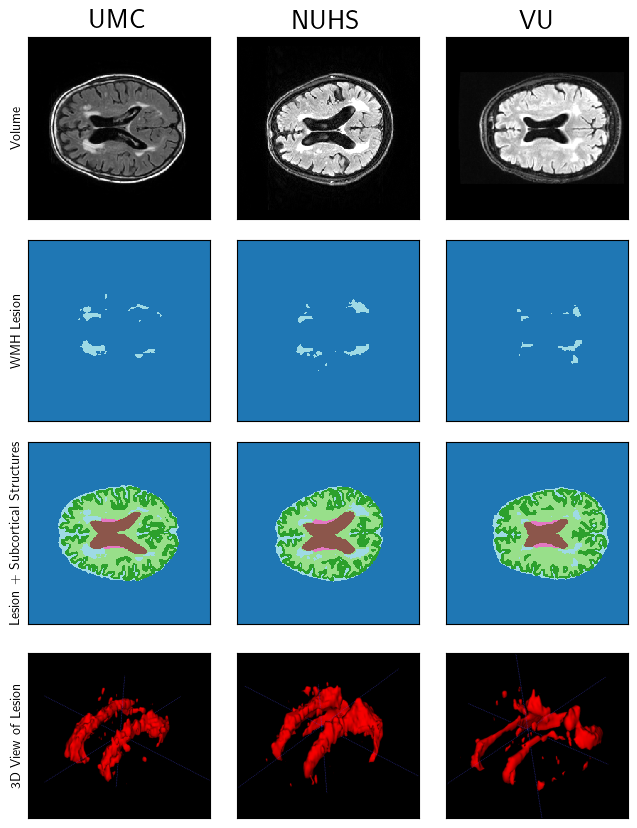

In [12]:
plot_arrays(arrays, (4, 3), 
            output_path='wmh_dataset.png',
            plt_args_array=plt_args_array, row_titles=titles, col_labels=y_labels,
            figsize_mult=10, title_fontsize=20, legend_fontsize=10,
            wspace=.15, hspace=0.05)

## Brain Dataset

In [13]:
hcp_t1 = np.array(Image.open('./healthy_brain_imgs/hcp_t1.png'))
hcp_t1_labels = np.array(Image.open('./healthy_brain_imgs/hcp_t1_labels.png'))

hcp_t2 = np.array(Image.open('./healthy_brain_imgs/hcp_t2.png'))
hcp_t2_labels = np.array(Image.open('./healthy_brain_imgs/hcp_t2_labels.png'))

abide_c = np.array(Image.open('./healthy_brain_imgs/abide_c.png'))
abide_c_labels = np.array(Image.open('./healthy_brain_imgs/abide_c_labels.png'))

In [14]:
img_plt_args = {'cmap': 'gray'}#, 'aspect': 'auto'}
labels_plt_args = {'cmap': 'tab20', 'vmin': 0, 'vmax': 14}#, 'aspect': 'auto'} 

arrays = [
    hcp_t1, hcp_t2, abide_c,
    hcp_t1_labels, hcp_t2_labels, abide_c_labels
]
 
plt_args_array = [
    *(3*[img_plt_args]),
    *(3*[labels_plt_args]),
]


titles = ['HCP-T1', 'HCP-T2', 'ABIDE-C.']
y_labels = ['Volume', 'Subcortical Structures']


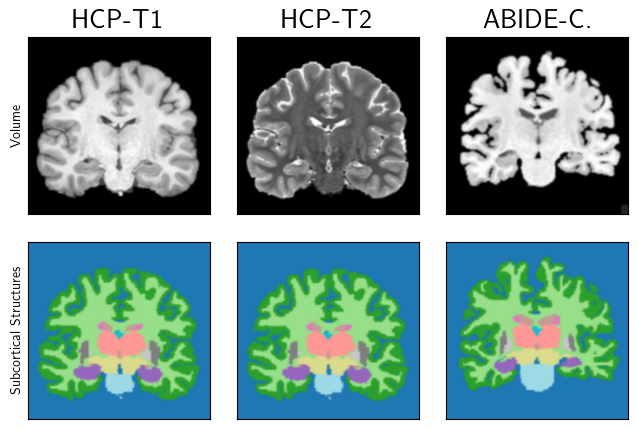

In [15]:
plot_arrays(arrays, (2, 3), 
            output_path='healthy_brain_dataset.png',
            plt_args_array=plt_args_array, row_titles=titles, col_labels=y_labels,
            figsize_mult=5, title_fontsize=20, legend_fontsize=10,
            wspace=.15, hspace=0.05)

## Main results plot

In [16]:
# Load hcp_t1 -> hcp_t2
gt = np.array(Image.open('./main_results/hcpt1_to_hcpt2/GT_hcp_t2_vol4.png'))
gt_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/GT_hcp_t2_vol4_all.png'))
gt_hcpt2 = np.concatenate((gt, gt_labels), axis=0)

baseline = np.array(Image.open('./main_results/hcpt1_to_hcpt2/GT_hcp_t2_vol4.png'))
baseline_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/Baseline_hcp_t2_vol4_all.png'))
baseline_hcpt2 = np.concatenate((baseline, baseline_labels), axis=0)

ours = np.array(Image.open('./main_results/hcpt1_to_hcpt2/Ours_hcp_t2_vol4.png'))
ours_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/Ours_hcp_t2_vol4_all.png'))
ours_hcpt2 = np.concatenate((ours, ours_labels), axis=0)

dae = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DAE_hcp_t2_vol4.png'))
dae_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DAE_hcp_t2_vol4_all.png'))
dae_hcpt2 = np.concatenate((dae, dae_labels), axis=0)

dae_reg = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DAEReg_hcp_t2_vol4.png'))
dae_reg_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DAEReg_hcp_t2_vol4_all.png'))
dae_reg_hcpt2 = np.concatenate((dae_reg, dae_reg_labels), axis=0)

difftta = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DiffTTA_hcp_t2_vol4.png'))
difftta_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/DiffTTA_hcp_t2_vol4_all.png'))
difftta_hcpt2 = np.concatenate((difftta, difftta_labels), axis=0)

ttas = np.array(Image.open('./main_results/hcpt1_to_hcpt2/TTAS_hcp_t2_vol4.png'))
ttas_labels = np.array(Image.open('./main_results/hcpt1_to_hcpt2/TTAS_hcp_t2_vol4_all.png'))
ttas_hcpt2 = np.concatenate((ttas, ttas_labels), axis=0)

hcp_t2 = [gt_hcpt2, baseline_hcpt2, ours_hcpt2, dae_hcpt2, dae_reg_hcpt2, difftta_hcpt2, ttas_hcpt2]


In [17]:
# Load hcp_t1 -> abide C.
gt = np.array(Image.open('./main_results/hcpt1_to_abideC/GT_abide_c_vol4.png'))
gt_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/GT_abide_c_vol4_all.png'))
gt_abidec = np.concatenate((gt, gt_labels), axis=0)

baseline = np.array(Image.open('./main_results/hcpt1_to_abideC/Baseline_abide_c_vol4.png'))
baseline_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/Baseline_abide_c_vol4_all.png'))
baseline_abidec = np.concatenate((baseline, baseline_labels), axis=0)

ours = np.array(Image.open('./main_results/hcpt1_to_abideC/Ours_abide_c_vol4.png'))
ours_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/Ours_abide_c_vol4_all.png'))
ours_abidec = np.concatenate((ours, ours_labels), axis=0)

dae = np.array(Image.open('./main_results/hcpt1_to_abideC/DAE_abide_c_vol4.png'))
dae_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/DAE_abide_c_vol4_all.png'))
dae_abidec = np.concatenate((dae, dae_labels), axis=0)

dae_reg = np.array(Image.open('./main_results/hcpt1_to_abideC/DAEReg_abide_c_vol4.png'))
dae_reg_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/DAEReg_abide_c_vol4_all.png'))
dae_reg_abidec = np.concatenate((dae_reg, dae_reg_labels), axis=0)

difftta = np.array(Image.open('./main_results/hcpt1_to_abideC/DiffTTA_abide_c_vol4.png'))
difftta_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/DiffTTA_abide_c_vol4_all.png'))
difftta_abidec = np.concatenate((difftta, difftta_labels), axis=0)

ttas = np.array(Image.open('./main_results/hcpt1_to_abideC/TTAS_abide_c_vol4.png'))
ttas_labels = np.array(Image.open('./main_results/hcpt1_to_abideC/TTAS_abide_c_vol4_all.png'))
ttas_abidec = np.concatenate((ttas, ttas_labels), axis=0)

abide_c = [gt_abidec, baseline_abidec, ours_abidec, dae_abidec, dae_reg_abidec, difftta_abidec, ttas_abidec]


In [18]:
# umc15 -> nuhs15
gt = np.array(Image.open('./main_results/umc15_to_nuhs_15/GT_nuhs15_vol3.png'))
gt_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/GT_nuhs15_vol3_lesion.png'))
gt_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/GT_nuhs15_vol3_all.png'))
gt_nuhs15 = np.concatenate((gt, gt_lesion, gt_labels), axis=0)

baseline = np.array(Image.open('./main_results/umc15_to_nuhs_15/Baseline_nuhs15_vol3.png'))
baseline_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/Baseline_nuhs15_vol3_lesion.png'))
baseline_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/Baseline_nuhs15_vol3_all.png'))
baseline_nuhs15 = np.concatenate((baseline, baseline_lesion, baseline_labels), axis=0)

ours = np.array(Image.open('./main_results/umc15_to_nuhs_15/Ours_nuhs15_vol3.png'))
ours_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/Ours_nuhs15_vol3_lesion.png'))
ours_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/Ours_nuhs15_vol3_all.png'))
ours_nuhs15 = np.concatenate((ours, ours_lesion, ours_labels), axis=0)

dae = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAE_nuhs15_vol3.png'))
dae_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAE_nuhs15_vol3_lesion.png'))
dae_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAE_nuhs15_vol3_all.png'))
dae_nuhs15 = np.concatenate((dae, dae_lesion, dae_labels), axis=0)

dae_reg = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAEReg_nuhs15_vol3.png'))
dae_reg_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAEReg_nuhs15_vol3_lesion.png'))
dae_reg_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/DAEReg_nuhs15_vol3_all.png'))
dae_reg_nuhs15 = np.concatenate((dae_reg, dae_reg_lesion, dae_reg_labels), axis=0)

difftta = np.array(Image.open('./main_results/umc15_to_nuhs_15/DiffTTA_nuhs15_vol3.png'))
difftta_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/DiffTTA_nuhs15_vol3_lesion.png'))
difftta_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/DiffTTA_nuhs15_vol3_all.png'))
difftta_nuhs15 = np.concatenate((difftta, difftta_lesion, difftta_labels), axis=0)

ttas = np.array(Image.open('./main_results/umc15_to_nuhs_15/TTAS_nuhs15_vol3.png'))
ttas_lesion = np.array(Image.open('./main_results/umc15_to_nuhs_15/TTAS_nuhs15_vol3_lesion.png'))
ttas_labels = np.array(Image.open('./main_results/umc15_to_nuhs_15/TTAS_nuhs15_vol3_all.png'))
ttas_nuhs15 = np.concatenate((ttas, ttas_lesion, ttas_labels), axis=0)

nuhs15 = [gt_nuhs15, baseline_nuhs15, ours_nuhs15, dae_nuhs15, dae_reg_nuhs15, difftta_nuhs15, ttas_nuhs15]


In [19]:
# umc15 -> vu15
gt = np.array(Image.open('./main_results/umc15_to_vu15/GT_vu15_vol3.png'))
gt_lesion = np.array(Image.open('./main_results/umc15_to_vu15/GT_vu15_vol3_lesion.png'))
gt_labels = np.array(Image.open('./main_results/umc15_to_vu15/GT_vu15_vol3_all.png'))
gt_vu15 = np.concatenate((gt, gt_lesion, gt_labels), axis=0)

baseline = np.array(Image.open('./main_results/umc15_to_vu15/Baseline_vu15_vol3.png'))
baseline_lesion = np.array(Image.open('./main_results/umc15_to_vu15/Baseline_vu15_vol3_lesion.png'))
baseline_labels = np.array(Image.open('./main_results/umc15_to_vu15/Baseline_vu15_vol3_all.png'))
baseline_vu15 = np.concatenate((baseline, baseline_lesion, baseline_labels), axis=0)

ours = np.array(Image.open('./main_results/umc15_to_vu15/Ours_vu15_vol3.png'))
ours_lesion = np.array(Image.open('./main_results/umc15_to_vu15/Ours_vu15_vol3_lesion.png'))
ours_labels = np.array(Image.open('./main_results/umc15_to_vu15/Ours_vu15_vol3_all.png'))
ours_vu15 = np.concatenate((ours, ours_lesion, ours_labels), axis=0)

dae = np.array(Image.open('./main_results/umc15_to_vu15/DAE_vu15_vol3.png'))
dae_lesion = np.array(Image.open('./main_results/umc15_to_vu15/DAE_vu15_vol3_lesion.png'))
dae_labels = np.array(Image.open('./main_results/umc15_to_vu15/DAE_vu15_vol3_all.png'))
dae_vu15 = np.concatenate((dae, dae_lesion, dae_labels), axis=0)

dae_reg = np.array(Image.open('./main_results/umc15_to_vu15/DAEReg_vu15_vol3.png'))
dae_reg_lesion = np.array(Image.open('./main_results/umc15_to_vu15/DAEReg_vu15_vol3_lesion.png'))
dae_reg_labels = np.array(Image.open('./main_results/umc15_to_vu15/DAEReg_vu15_vol3_all.png'))
dae_reg_vu15 = np.concatenate((dae_reg, dae_reg_lesion, dae_reg_labels), axis=0)

difftta = np.array(Image.open('./main_results/umc15_to_vu15/DiffTTA_vu15_vol3.png'))
difftta_lesion = np.array(Image.open('./main_results/umc15_to_vu15/DiffTTA_vu15_vol3_lesion.png'))
difftta_labels = np.array(Image.open('./main_results/umc15_to_vu15/DiffTTA_vu15_vol3_all.png'))
difftta_vu15 = np.concatenate((difftta, difftta_lesion, difftta_labels), axis=0)

ttas = np.array(Image.open('./main_results/umc15_to_vu15/TTAS_vu15_vol3.png'))
ttas_lesion = np.array(Image.open('./main_results/umc15_to_vu15/TTAS_vu15_vol3_lesion.png'))
ttas_labels = np.array(Image.open('./main_results/umc15_to_vu15/TTAS_vu15_vol3_all.png'))
ttas_vu15 = np.concatenate((ttas, ttas_lesion, ttas_labels), axis=0)

vu15 = [gt_vu15, baseline_vu15, ours_vu15, dae_vu15, dae_reg_vu15, difftta_vu15, ttas_vu15]

In [20]:
len(nuhs15)

7

In [21]:
len(vu15)

7

In [22]:
arrays = [
    *nuhs15,
    *vu15
]

titles = ['Ground Truth', 'Baseline', 'Ours', 'DAE', 'DAE + Reg', 'DiffTTA', 'TTAS']
y_labels = [r'UMC-15 $\to$ VU-15', r'UMC-15 $\to$ NUHS-15']#, r'HCP-T1 $\to$ HCP-T2', r'HCP-T1 $\to$ ABIDE-C']
img_args = {'aspect': 'auto'}
plt_args_array = len(arrays) * [img_args]


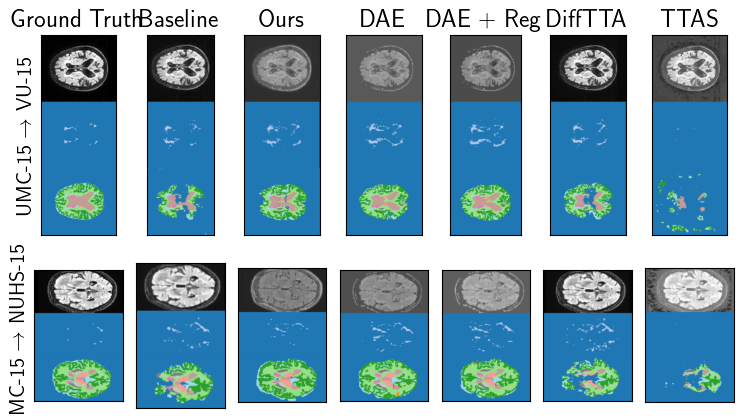

In [23]:
plot_arrays(arrays, (2, 7), 
            output_path='main_results_wmh.png',
            plt_args_array=None, row_titles=titles, col_labels=y_labels,
            figsize_mult=5, title_fontsize=18, legend_fontsize=15,
            wspace=.15, hspace=0.00, tight_layout=False, half_width=True)

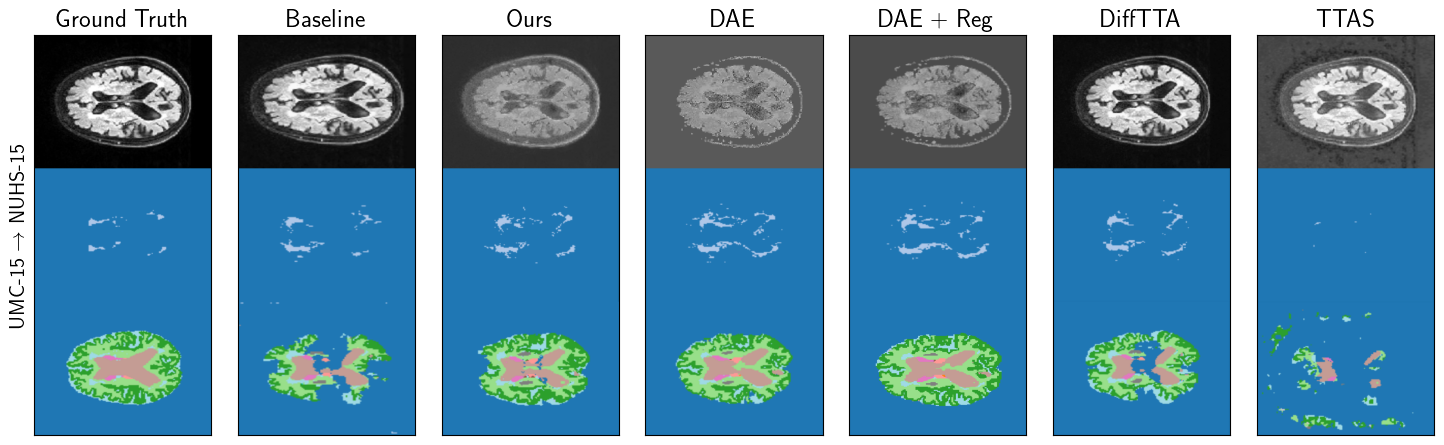

In [24]:
y_labels = [r'UMC-15 $\to$ NUHS-15']#, r'HCP-T1 $\to$ HCP-T2', r'HCP-T1 $\to$ ABIDE-C']

plot_arrays(nuhs15, (1, 7), 
            output_path='main_results_umc15_nuhs15.png',
            plt_args_array=len(nuhs15) * [img_args], 
            row_titles=titles, col_labels=y_labels,
            figsize_mult=5, title_fontsize=18, legend_fontsize=15,
            wspace=.15, hspace=0.00, tight_layout=False, half_width=True)

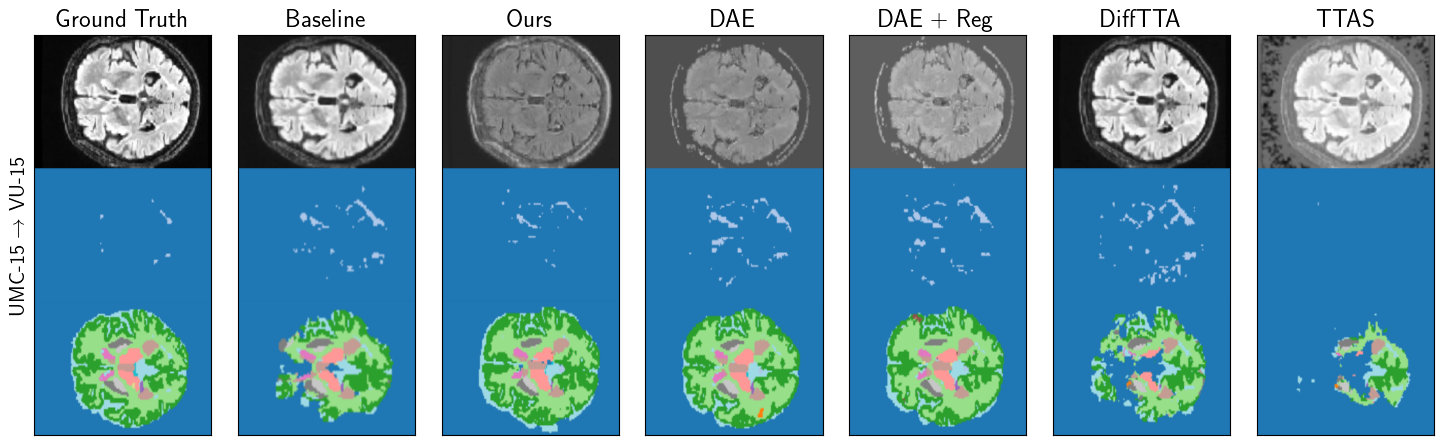

In [25]:
y_labels = [r'UMC-15 $\to$ VU-15']#, r'HCP-T1 $\to$ HCP-T2', r'HCP-T1 $\to$ ABIDE-C']

plot_arrays(vu15, (1, 7), 
            output_path='main_results_umc15_vu15.png',
            plt_args_array=len(nuhs15) * [img_args], 
            row_titles=titles, col_labels=y_labels,
            figsize_mult=5, title_fontsize=18, legend_fontsize=15,
            wspace=.15, hspace=0.00, tight_layout=False, half_width=True)

In [26]:
arrays = [
    *hcp_t2,
    *abide_c
]

titles = ['Ground Truth', 'Baseline', 'Ours', 'DAE', 'DAE + Reg', 'DiffTTA', 'TTAS']
y_labels = [ r'HCP-T1 $\to$ HCP-T2', r'HCP-T1 $\to$ ABIDE-C']

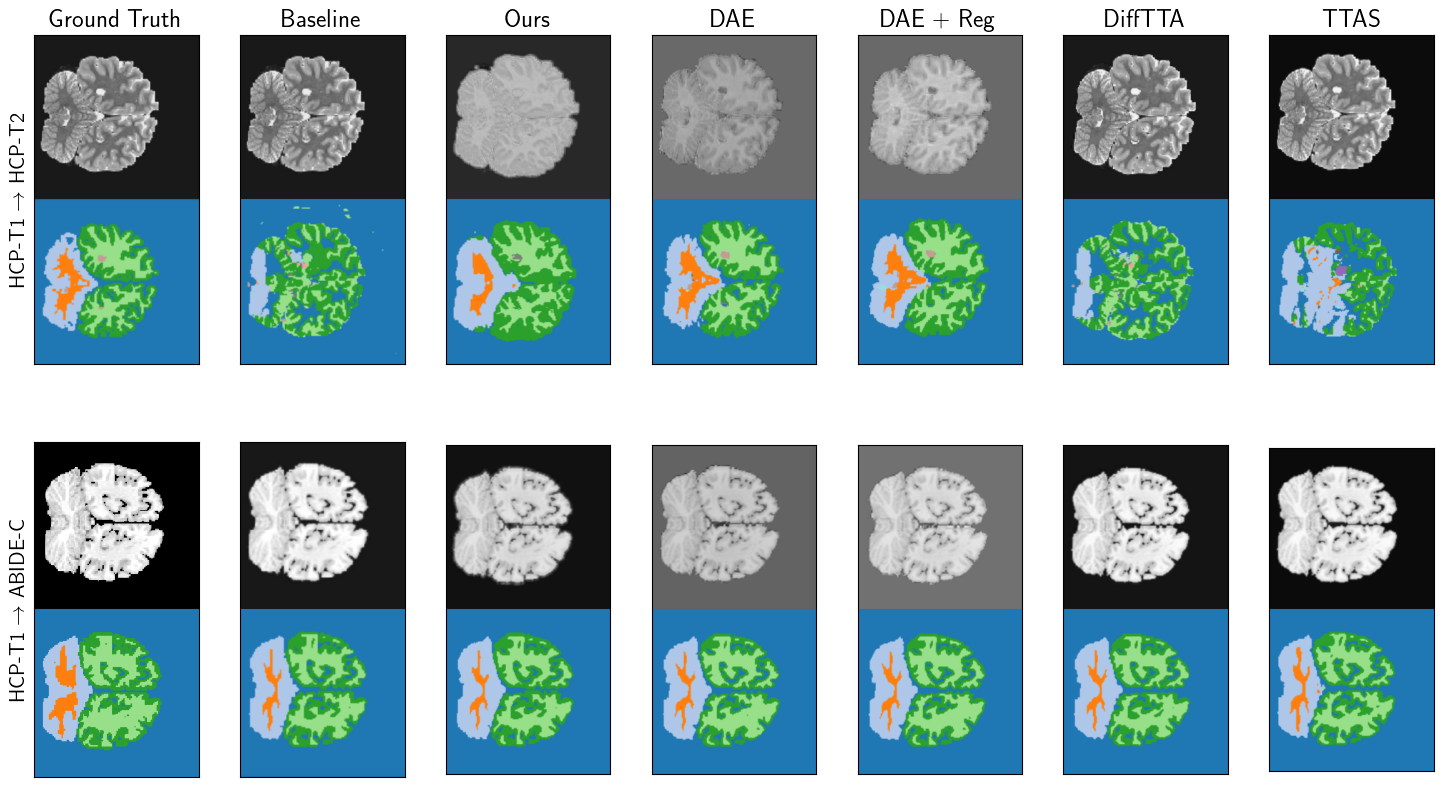

In [27]:
plot_arrays(arrays, (2, 7), 
            output_path='main_results_healthy_brain.png',
            plt_args_array=None,#len(arrays) * [img_args], 
            row_titles=titles, col_labels=y_labels,
            figsize_mult=10, title_fontsize=18, legend_fontsize=15,
            wspace=.25, hspace=0.05, tight_layout=False, half_width=True)

## Plot losses

In [28]:
import pandas as pd

In [77]:
def plot_losses(
    losses_to_plot: dict,
    output_path = None,
    title='DDPM Loss vs noise t', 
    figsize=(15, 5),
    title_fontsize=20,
    axes_fontsize=15,
    tick_fontsize=12
    ):
    
    
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=title_fontsize)

    for legend, loss_df in losses_to_plot.items():    
        summary_df = loss_df.describe()
        summary_df.drop('Unnamed: 0', axis=1, inplace=True)
        fmt = '--x' if 'unconditional' in legend else '-o'
        alpha = 0.7 if 'unconditional' in legend else 0.9
        
        if 'source domain' in legend:
            color = 'steelblue' if 'bad' not in legend else 'darkgreen'
            
        else:
            color = 'darkorange'
            
        plt.errorbar(
            x=summary_df.loc['mean'].index.values,
            y=summary_df.loc['mean'],
            yerr=summary_df.loc['std'], 
            fmt=fmt,
            alpha=alpha,
            label=legend,
            color=color
            )
        # Plot the mean loss over all t
        # print(f'Mean loss over all t - {legend}: {summary_df.loc["mean"].mean()}')
        # plt.axhline(y=summary_df.loc['mean'].mean(),
        #         color='b', linestyle='--', label=f'mean loss - {legend}')
    
    # Display legends
    plt.legend(loc='lower left', fontsize='large')  # You can also use specific point sizes like 14, 16 etc.    
    plt.yscale('log')
    plt.xlabel(r'Diffusion step $t$', fontsize=axes_fontsize)
    plt.ylabel('Loss', fontsize=axes_fontsize)
    plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)  # Increase font size to 14

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')



### healthy brain

In [97]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t1_val/none/loss_conditional_per_t_td_hcp_t1__val__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t1_val/none/loss_unconditional_per_t_td_hcp_t1__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_val/hcp_t1_val/same_patient_very_different_labels/loss_conditional_per_t_td_hcp_t1__val__conditional_mismatch_same_patient_very_different_labels.csv')

td_hcpt2 = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t2_train/none/loss_conditional_per_t_td_hcp_t2__train__conditional.csv')
td_hcpt2_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t2_train/none/loss_unconditional_per_t_td_hcp_t2__train__unconditional.csv')

In [98]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td_hcpt2,
    'target domain - unconditional': td_hcpt2_uncond
}

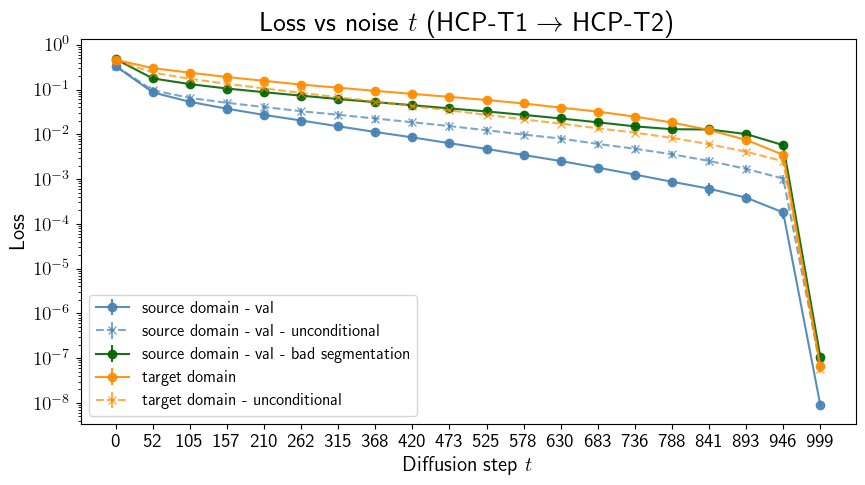

In [99]:
plot_losses(
    losses_dict,
    output_path='sanity_check_hcpt2.png',
    title=r'Loss vs noise $t$ (HCP-T1 $\to$ HCP-T2)', 
    figsize=(10, 5),
    tick_fontsize=14
    )

### Abide-Caltech 

In [100]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t1_val/none/loss_conditional_per_t_td_hcp_t1__val__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/hcp_t1_val/none/loss_unconditional_per_t_td_hcp_t1__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_val/hcp_t1_val/same_patient_very_different_labels/loss_conditional_per_t_td_hcp_t1__val__conditional_mismatch_same_patient_very_different_labels.csv')

td_hcpt2 = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/abide_caltech_train/none/loss_conditional_per_t_td_abide_caltech__train__conditional.csv')
td_hcpt2_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/brain/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing_norm_q_0.001_0.999/cpt_6/hcp_t1_train/abide_caltech_train/none/loss_unconditional_per_t_td_abide_caltech__train__unconditional.csv')

In [101]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td_hcpt2,
    'target domain - unconditional': td_hcpt2_uncond
}

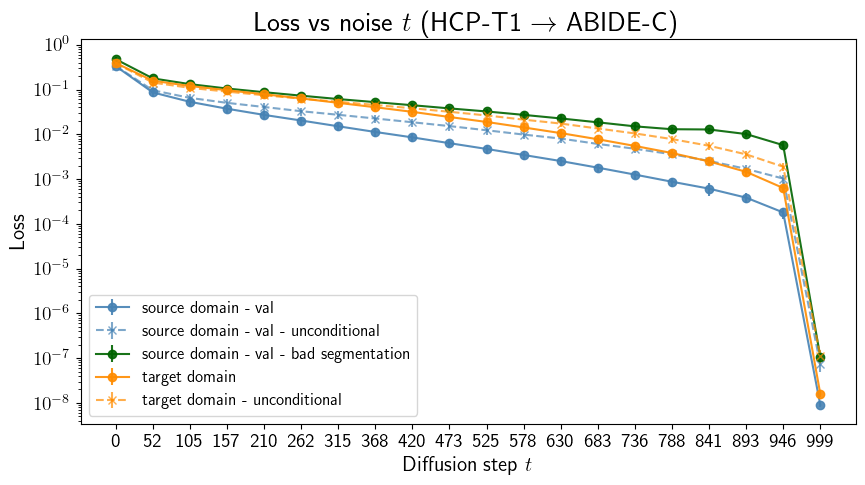

In [102]:
plot_losses(
    losses_dict,
    output_path='sanity_check_abidec.png',
    title=r'Loss vs noise $t$ (HCP-T1 $\to$ ABIDE-C)', 
    figsize=(10, 5),
    tick_fontsize=14
    )

### WMH-15

In [103]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/umc_w_synthseg_labels_val/none/loss_conditional_per_t_td_umc_w_synthseg_labels__val__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/umc_w_synthseg_labels_val/none/loss_unconditional_per_t_td_umc_w_synthseg_labels__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_val/umc_w_synthseg_labels_val/same_patient_very_different_labels/loss_conditional_per_t_td_umc_w_synthseg_labels__val__conditional_mismatch_same_patient_very_different_labels.csv')

td = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/nuhs_w_synthseg_labels_train/none/loss_conditional_per_t_td_nuhs_w_synthseg_labels__train__conditional.csv')
td_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/nuhs_w_synthseg_labels_train/none/loss_unconditional_per_t_td_nuhs_w_synthseg_labels__train__unconditional.csv')

In [104]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td,
    'target domain - unconditional': td_uncond
}

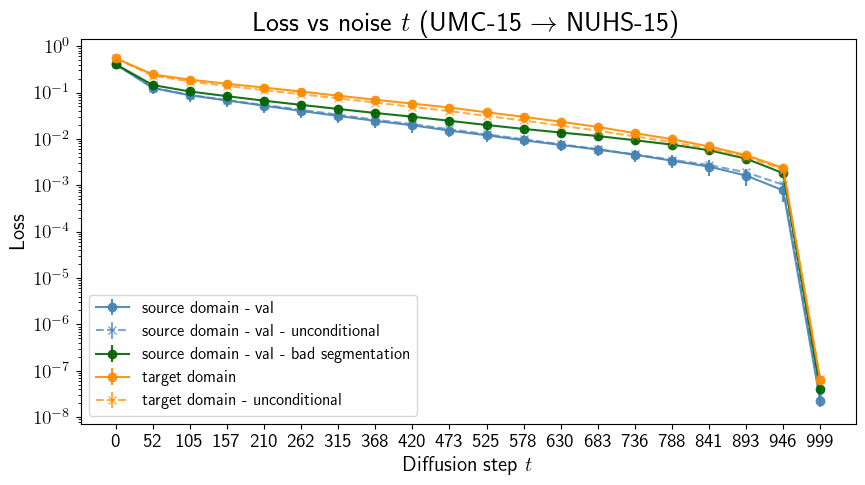

In [105]:
plot_losses(
    losses_dict,
    output_path='sanity_check_nuhs15.png',
    title=r'Loss vs noise $t$ (UMC-15 $\to$ NUHS-15)', 
    figsize=(10, 5),
    tick_fontsize=14
    )

#### VU-15

In [106]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/umc_w_synthseg_labels_val/none/loss_conditional_per_t_td_umc_w_synthseg_labels__val__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/umc_w_synthseg_labels_val/none/loss_unconditional_per_t_td_umc_w_synthseg_labels__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_val/umc_w_synthseg_labels_val/same_patient_very_different_labels/loss_conditional_per_t_td_umc_w_synthseg_labels__val__conditional_mismatch_same_patient_very_different_labels.csv')

td = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/vu_w_synthseg_labels_train/none/loss_conditional_per_t_td_vu_w_synthseg_labels__train__conditional.csv')
td_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_w_synthseg_labels_train/vu_w_synthseg_labels_train/none/loss_unconditional_per_t_td_vu_w_synthseg_labels__train__unconditional.csv')

In [107]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td,
    'target domain - unconditional': td_uncond
}

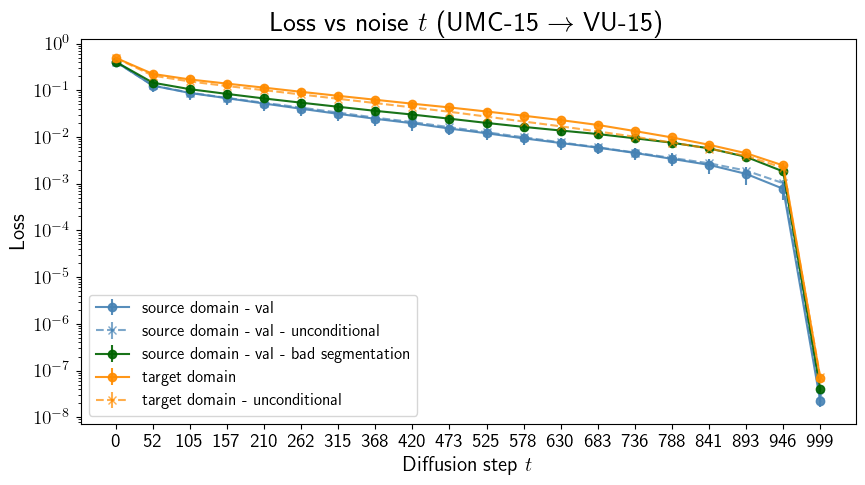

In [108]:
plot_losses(
    losses_dict,
    output_path='sanity_check_vu15.png',
    title=r'Loss vs noise $t$ (UMC-15 $\to$ VU-15)', 
    figsize=(10, 5),
    tick_fontsize=14
    )

### WMH

In [109]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/umc_val/none/loss_conditional_per_t_sd_umc__train__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/umc_val/none/loss_unconditional_per_t_td_umc__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_val/umc_val/same_patient_very_different_labels/loss_conditional_per_t_td_umc__val__conditional_mismatch_same_patient_very_different_labels.csv')

td = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/nuhs_train/none/loss_conditional_per_t_td_nuhs__train__conditional.csv')
td_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/nuhs_train/none/loss_unconditional_per_t_td_nuhs__train__unconditional.csv')

In [110]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td,
    'target domain - unconditional': td_uncond
}

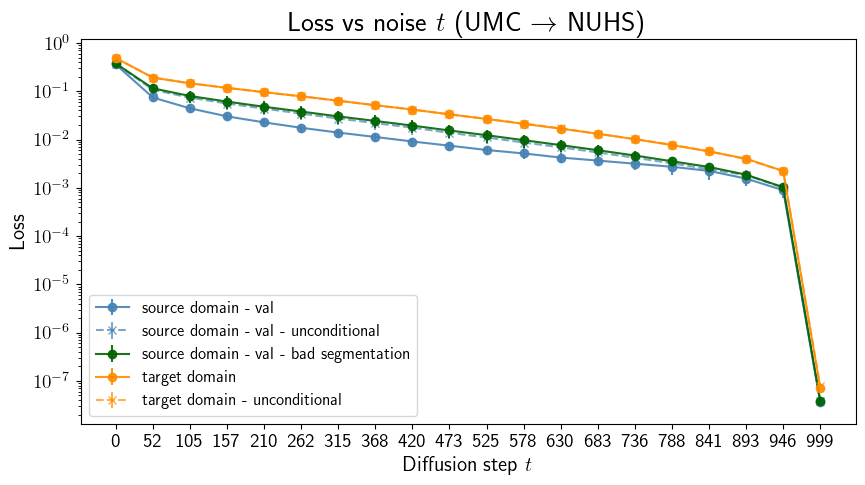

In [116]:
plot_losses(
    losses_dict,
    output_path='sanity_check_nuhs.png',
    title=r'Loss vs noise $t$ (UMC $\to$ NUHS)', 
    figsize=(10, 5),
    tick_fontsize=14
    )

In [112]:
sd_val = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/umc_val/none/loss_conditional_per_t_sd_umc__train__conditional.csv')
sd_val_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/umc_val/none/loss_unconditional_per_t_td_umc__val__unconditional.csv')

sd_bad_seg = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_val/umc_val/same_patient_very_different_labels/loss_conditional_per_t_td_umc__val__conditional_mismatch_same_patient_very_different_labels.csv')

td = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/vu_train/none/loss_conditional_per_t_td_vu__train__conditional.csv')
td_uncond = pd.read_csv('/scratch_net/biwidl319/jbermeo/results/wmh/ddpm/latest_ddpms/no_synthseg_labels/batch_size_130_dim_64_dim_mults_1_2_2_2_uncond_rate_0.2_imgsize_128x128_no_class_balancing/cpt_4/umc_train/vu_train/none/loss_unconditional_per_t_td_vu__train__unconditional.csv')

In [113]:
losses_dict = {
    'source domain - val': sd_val,
    'source domain - val - unconditional': sd_val_uncond,
    'source domain - val - bad segmentation': sd_bad_seg,
    'target domain': td,
    'target domain - unconditional': td_uncond
}

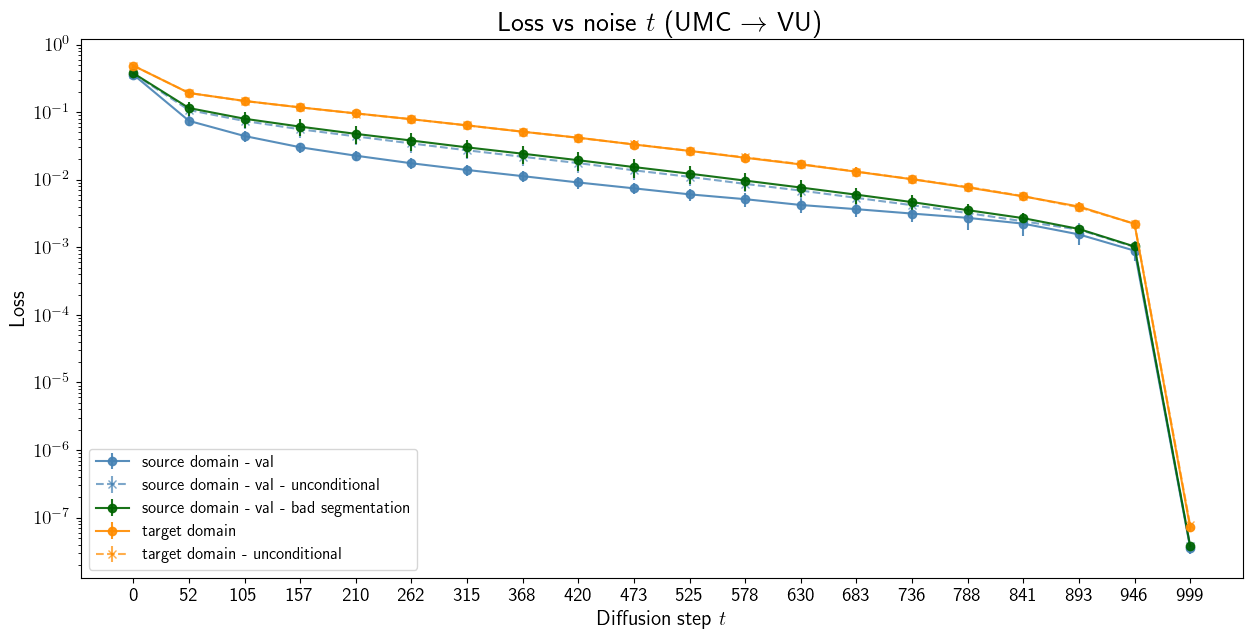

In [114]:
plot_losses(
    losses_dict,
    output_path='sanity_check_vu.png',
    title=r'Loss vs noise $t$ (UMC $\to$ VU)', 
    figsize=(15, 7),
    tick_fontsize=14
    )